In [1]:
import dataclasses
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import ray
import ray.rllib

import pyquake.proto
import q1physrl.env
import q1physrl.train

/home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
ray.init()

2020-04-03 08:31:36,464	INFO resource_spec.py:212 -- Starting Ray with 1.71 GiB memory available for workers and up to 0.87 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-04-03 08:31:36,901	INFO services.py:1083 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '192.168.178.24',
 'redis_address': '192.168.178.24:54831',
 'object_store_address': '/tmp/ray/session_2020-04-03_08-31-36_440229_1777/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-03_08-31-36_440229_1777/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-04-03_08-31-36_440229_1777'}

2020-04-03 08:31:39,236	WARNING worker.py:1058 -- The dashboard on node matt-ThinkPad-X1-Carbon failed with the following error:
Traceback (most recent call last):
  File "/home/matt/ray/python/ray/dashboard/dashboard.py", line 918, in <module>
    redis_password=args.redis_password,
  File "/home/matt/ray/python/ray/dashboard/dashboard.py", line 134, in __init__
    self.setup_routes()
  File "/home/matt/ray/python/ray/dashboard/dashboard.py", line 333, in setup_routes
    build_dir)
FileNotFoundError: [Errno 2] Dashboard build directory not found. If installing from source, please follow the additional steps required to build the dashboard (cd python/ray/dashboard/client && npm ci && npm run build): '/home/matt/ray/python/ray/dashboard/client/build'



In [3]:
config = q1physrl.env.Config(
    num_envs=1,
    auto_jump=True,
    time_limit=15,
    key_press_delay=0.,
    initial_yaw_range=(0, 360),
    max_initial_speed=700.,
    zero_start_prob=1,
    action_range=10,
    discrete_yaw_steps=-1,
    speed_reward=True,
    fmove_max=800,
    smove_max=1060,
    smooth_keys=True,
    allow_jump=True,
    allow_yaw=True,
)

trainer = q1physrl.train.make_trainer(q1physrl.train.make_run_config(config))

2020-04-03 08:31:43,078	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-04-03 08:31:43,125	ERROR logger.py:184 -- pip install 'ray[tune]' to see TensorBoard files.
2020-04-03 08:31:43,126	WARNING logger.py:286 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2020-04-03 08:31:43,129	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(pid=1829) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=1829)   warnings.warn(msg)
(pid=1827) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=1827)   warnings.warn(msg)
(pid=1828) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=1828)   warnings.warn(msg)
(pid=1831) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. You

2020-04-03 08:31:59,898	INFO trainable.py:178 -- _setup took 16.770 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2020-04-03 08:31:59,899	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2020-04-03 08:32:02,795	ERROR worker.py:998 -- Possible unhandled error from worker: ray::IDLE (pid=1831, ip=192.168.178.24)
  File "python/ray/_raylet.pyx", line 438, in ray._raylet.execute_task
  File "/home/matt/ray/python/ray/memory_monitor.py", line 122, in raise_if_low_memory
    self.error_threshold))
ray.memory_monitor.RayOutOfMemoryError: More than 95% of the memory on node matt-ThinkPad-X1-Carbon is used (7.47 / 7.69 GB). The top 10 memory consumers are:

PID	MEM	COMMAND
21440	0.74GiB	tmux
1777	0.47GiB	/home/matt/.virtualenvs/100m-rl/bin/python3 -m ipykernel_launcher -f /home/matt/.local/share/jupyter
31613	0.41GiB	/usr/lib/firefox/firefox
1831	0.33GiB	ray::IDLE
1827	0.33GiB	ray::IDLE
1828	0.33GiB	ray::I

In [4]:
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-26_18-30-58enaj6dzm/checkpoint_54/checkpoint-54'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-27_21-54-210mybah6w/checkpoint_38/checkpoint-38'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_18-38-4507_f9y9o/checkpoint_42/checkpoint-42'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_18-48-34d96of62s/checkpoint_147/checkpoint-147'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_19-42-287sgxfik5/checkpoint_20/checkpoint-20'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_20-03-30jpgozu93/checkpoint_209/checkpoint-209'
# FNAME = '/home/matt/checkpoint-141'
# FNAME = '/home/matt/checkpoint-8421'
# FNAME = '/home/matt/checkpoint-701'
# FNAME = '/home/matt/checkpoint-13421'
# FNAME = '/home/matt/checkpoint-5441'
# FNAME = '../checkpoints/checkpoint-4169'
# FNAME = '../checkpoints/checkpoint-4468'
# FNAME = '../checkpoints/checkpoint-8054'
# FNAME = '../checkpoints/checkpoint-7867'
# FNAME = '../checkpoints/checkpoint-5199'
# FNAME = '../checkpoints/checkpoint-8765'
# FNAME = '../checkpoints/checkpoint-11625'
# FNAME = '../checkpoints/checkpoint-2458'
# FNAME = '../checkpoints/checkpoint-485'
# FNAME = '../checkpoints/checkpoint-82'
# FNAME = '../checkpoints/checkpoint-2929'
# FNAME = '../checkpoints/checkpoint-291'
# FNAME = '../checkpoints/checkpoint-98'
# FNAME = '../checkpoints/checkpoint-194'
# FNAME = '../checkpoints/checkpoint-1785'
# FNAME = '../checkpoints/checkpoint-987'
# FNAME = '../checkpoints/checkpoint-860'
# FNAME = '../checkpoints/checkpoint-2837'
# FNAME = '../checkpoints/checkpoint-1826'
# FNAME = '../checkpoints/checkpoint-3075'
# FNAME = '../checkpoints/checkpoint-4889'
# FNAME = '../checkpoints/checkpoint-3036'
# FNAME = '../checkpoints/checkpoint-2816'
# FNAME = '../checkpoints/checkpoint-2989'    # <--- this one beats the WR  (sha256sum  bb699832aa641d867391392e41eb545a87ad0e3e60a281633746a94fca9997d9)
# FNAME = '../checkpoints/checkpoint-3089'
# FNAME = '../checkpoints/checkpoint-1703'    # <--- no jump
# FNAME = '../checkpoints/checkpoint-301'   # <--- no jump no yaw
# FNAME = '../checkpoints/checkpoint-301'   # <--- no jump no yaw no rate
FNAME = '../checkpoints/checkpoint-3527'   # <--- auto jump


trainer.restore(FNAME)

2020-04-03 08:32:05,108	WARNING trainable.py:210 -- Getting current IP.
2020-04-03 08:32:05,109	INFO trainable.py:416 -- Restored on 192.168.178.24 from checkpoint: ../checkpoints/checkpoint-3527
2020-04-03 08:32:05,111	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 3527, '_timesteps_total': 176350000, '_time_total': 118024.83207297325, '_episodes_total': 441219}


In [5]:
RUN_NAME = "auto_jump"
DEMO_FILE_NAME = f"{RUN_NAME}.dem"

In [6]:
dataclasses.asdict(config)

{'num_envs': 1,
 'auto_jump': True,
 'initial_yaw_range': (0, 360),
 'max_initial_speed': 700.0,
 'zero_start_prob': 1,
 'time_delta': 0.014,
 'action_range': 10,
 'time_limit': 15,
 'key_press_delay': 0.0,
 'discrete_yaw_steps': -1,
 'speed_reward': True,
 'fmove_max': 800,
 'smove_max': 1060,
 'hover': False,
 'smooth_keys': True,
 'allow_jump': True,
 'allow_yaw': True}

2020-04-03 08:32:10,136	ERROR worker.py:998 -- Possible unhandled error from worker: ray::IDLE (pid=1828, ip=192.168.178.24)
  File "python/ray/_raylet.pyx", line 437, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 438, in ray._raylet.execute_task
  File "/home/matt/ray/python/ray/memory_monitor.py", line 122, in raise_if_low_memory
    self.error_threshold))
ray.memory_monitor.RayOutOfMemoryError: More than 95% of the memory on node matt-ThinkPad-X1-Carbon is used (7.47 / 7.69 GB). The top 10 memory consumers are:

PID	MEM	COMMAND
21440	0.74GiB	tmux
1777	0.47GiB	/home/matt/.virtualenvs/100m-rl/bin/python3 -m ipykernel_launcher -f /home/matt/.local/share/jupyter
31613	0.41GiB	/usr/lib/firefox/firefox
1831	0.33GiB	ray::IDLE
1829	0.33GiB	ray::IDLE
1827	0.33GiB	ray::IDLE
1828	0.33GiB	ray::IDLE
5542	0.29GiB	gimp-2.8
10432	0.27GiB	/usr/lib/firefox/firefox -contentproc -childID 114 -isForBrowser -prefsLen 10028 -prefMapSize 213159
18400	0.25GiB	/usr/lib/firefox/firefox -co

In [7]:
with open(DEMO_FILE_NAME, 'wb') as f:
    obs, action = await q1physrl.env.eval_coro(dataclasses.asdict(config), 26000, trainer, f)
obs = np.array(obs)

Make input animation

In [8]:
obs[:, 2]

array([0.32875, 0.325  , 0.32125, ..., 0.4    , 0.4    , 0.4    ])

In [13]:
np.arctan2(np.mean(obs[:, -3]), np.mean(obs[:, -2])) * 180. / np.pi

10.093931080463127

In [8]:
from q1physrl import analyse

FPS = 60

in_keys = np.stack(action)[:, :4, 0]
in_keys1 = in_keys
in_time = np.arange(0, len(in_keys)) / 72

def rate_limit_keys(in_keys, in_time):
    last_keys = np.full((4,), False)
    last_key_press_time = np.full((4,), -config.key_press_delay)
    
    out = []
    for k, t in zip(in_keys, in_time):
        elapsed = (t >= last_key_press_time + config.key_press_delay)
        keys = k & (elapsed | last_keys)
        last_key_press_time = np.where(keys & ~last_keys, t, last_key_press_time)
        out.append(keys)
        last_keys = keys
    return np.stack(out)

in_keys = rate_limit_keys(in_keys, in_time)

# Frame rate conversion
out_time = np.arange(0, int(len(in_time) * FPS / 72)) / FPS
out_keys = in_keys[np.searchsorted(in_time, out_time, side='right') - 1]

# Produce the frames
dir_ = pathlib.Path('input_anims') / f"{RUN_NAME}"
dir_.mkdir(exist_ok=True, parents=True)
for i, (time, keys) in enumerate(zip(out_time, out_keys)):
    if i % 10 == 0:
        print(i, len(out_time))
    im = np.zeros((251, 401, 4), dtype=np.uint8)
    xform = np.array([[5, 0, 0],
                      [0, 5, 0],
                      [0, 0, 1]])
    analyse.draw_inputs(im, keys, 0.0, xform)
    plt.figure(figsize=(12, 12))
    plt.imsave(str(dir_ / f"{i:05d}.png"), im)
    plt.close()

ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending coro=<AsyncClient._read_messages() running at /home/matt/pyquake/pyquake/client.py:215> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f19242ccc78>()]> cb=[AsyncClient.connect.<locals>.<lambda>() at /home/matt/pyquake/pyquake/client.py:303]>


0 901
10 901
20 901
30 901
40 901
50 901
60 901
70 901
80 901
90 901
100 901
110 901
120 901
130 901
140 901
150 901
160 901
170 901
180 901
190 901
200 901
210 901
220 901
230 901
240 901
250 901
260 901
270 901
280 901
290 901
300 901
310 901
320 901
330 901
340 901
350 901
360 901
370 901
380 901
390 901
400 901
410 901
420 901
430 901
440 901
450 901
460 901
470 901
480 901
490 901
500 901
510 901
520 901
530 901
540 901
550 901
560 901
570 901
580 901
590 901
600 901
610 901
620 901
630 901
640 901
650 901
660 901
670 901
680 901
690 901
700 901
710 901
720 901
730 901
740 901
750 901
760 901
770 901
780 901
790 901
800 901
810 901
820 901
830 901
840 901
850 901
860 901
870 901
880 901
890 901
900 901


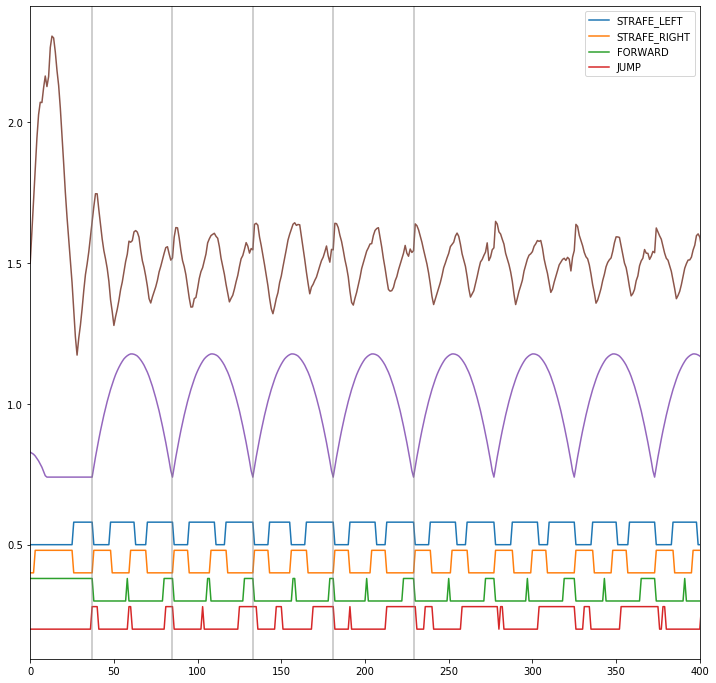

In [43]:
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.plot(in_keys[:, i] * 0.08 + 0.5 - 0.1 * i, label=q1physrl.env.Key(i).name)
plt.plot(0.5 + obs[:, 2])
plt.plot(0.5 + obs[:, 1])
for x in 37 + np.arange(5) * 48:
    plt.axvline(x, alpha=0.5, color='gray')
plt.xlim(0, 400)
plt.legend()

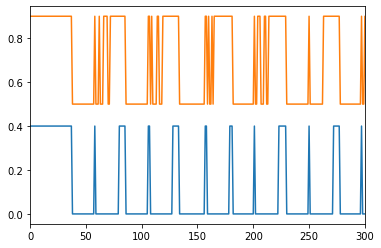

In [28]:
plt.xlim(0, 300)
plt.plot(in_keys[:, 2] * 0.4)
plt.plot(in_keys1[:, 2]* 0.4 + 0.5)

Plot raw actions over time

In [8]:
# plt.plot(obs[:, 1])
# plt.plot(obs[:, 2])

# plt.show()
# for a, k in zip(action.T, q1physrl.env.Key):
#     plt.title(str(k))
#     plt.plot(obs[:, 2] / 30 - 1)
#     plt.plot(np.arange(len(a)), a, marker='+')
#     plt.show()

Convert the actions into movements, and plot them over time

In [9]:
action_to_move = q1physrl.env.ActionToMove(config)
action_to_move.vector_reset()
yaw, smove, fmove = np.array([action_to_move.map([a], np.float32(0.014 * i)[None])
                                for i, a in enumerate(action)])[:, :, 0].T

ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending coro=<AsyncClient._read_messages() running at /home/matt/pyquake/pyquake/client.py:215> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7feac5c34b28>()]> cb=[AsyncClient.connect.<locals>.<lambda>() at /home/matt/pyquake/pyquake/client.py:303]>


TypeError: vector_reset() missing 1 required positional argument: 'yaw'

In [ ]:
plt.xlim(100, 200)
plt.plot(20 * (yaw - 90))
plt.plot(smove)
plt.plot(20 * obs[:, q1physrl.env.Obs.Z_POS])

In [ ]:
plt.plot(fmove)
plt.plot(20 * obs[:, q1physrl.env.Obs.Z_POS])

Take the actions from the above run and push them through the PhysEnv.
Comparing the observations will reveal potential bugs.

In [ ]:
env = q1physrl.env.PhysEnv(dataclasses.asdict(config))
o, = env.vector_reset()

obs2= [o]

for a in action:
    (o,), _, _, _ = env.vector_step([a])
    obs2.append(o)
    
obs2 = np.stack(obs2[:-1])
# obs2 *= q1physrl.env._OBS_SCALE

In [ ]:
plt.plot(np.cumsum(obs2[:, -2]) * 200 * 0.014)

In [ ]:
plt.plot((obs - obs2)[:, 0])

In [ ]:
plt.xlim(0, 100)
plt.plot(np.abs(obs - obs2))
# plt.plot(np.max(np.abs(obs - obs2), axis=1))
# plt.plot(np.argmax(np.abs(obs - obs2), axis=1))
plt.

In [ ]:
plt.plot(np.cumsum(obs2[:, 3]), np.cumsum(obs2[:, 4]))

Open the demo file we just made, and measure the speed

In [9]:
def load_demo_file(demo_file_path):
    view_entity = None
    origin = None
    origins = []
    times = []

    time = None

    def patch_vec(old_vec, update):
        return tuple(v if u is None else u for v, u in zip(old_vec, update))

    with open(demo_file_path, 'rb') as f:
        for angles, msg in pyquake.proto.read_demo_file(f):
            if msg.msg_type == pyquake.proto.ServerMessageType.SETVIEW:
                view_entity = msg.viewentity
            if (msg.msg_type == pyquake.proto.ServerMessageType.SPAWNBASELINE and
                    msg.entity_num == view_entity):
                origin = msg.origin
            if (msg.msg_type == pyquake.proto.ServerMessageType.UPDATE and
                    msg.entity_num == view_entity):
                origin = patch_vec(origin, msg.origin)
                origins.append(origin)
                times.append(time)
            if msg.msg_type == pyquake.proto.ServerMessageType.TIME:
                time = msg.time
    return np.array(origins), np.array(times)

In [10]:
DEMO_FILE_NAME

'no_jump.dem'

In [11]:
origins, times = load_demo_file(DEMO_FILE_NAME)
# origins, times = load_demo_file("wr40.dem")
ref_origins, ref_times = load_demo_file('/home/matt/Downloads/100mfort968_2.dem')

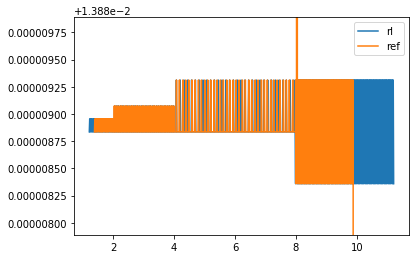

In [12]:
# plt.ylim(0.0138, 0.0141)
plt.ylim(1. / 72 - 0.000001, 1. / 72 + 0.000001)
plt.plot(times[:-1], np.diff(times), label='rl')
plt.plot(ref_times[:-1], np.diff(ref_times), label='ref')
plt.legend()

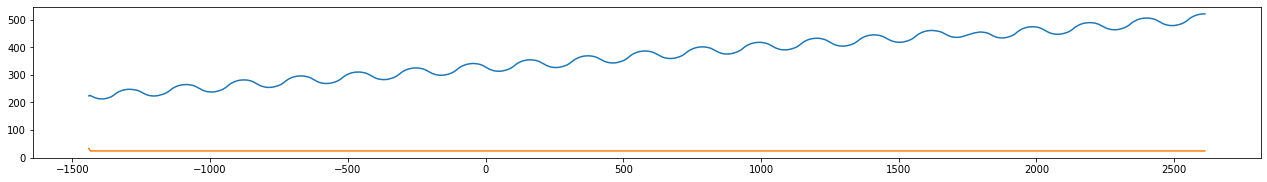

In [13]:
plt.figure(figsize=(22, 12))
plt.axes().set_aspect('equal')
t = np.array(origins)
plt.plot(t[:, 1], t[:, 0])
plt.plot(t[:, 1], t[:, 2])

distance travelled 4051.625
final speed 412.6082251082251


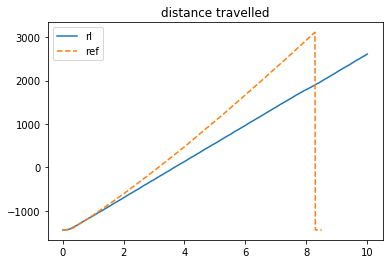

In [14]:
print('distance travelled', np.diff(np.array([o[1] for o in origins])).sum())
print('final speed', np.diff([o[1] for o in origins][-100:]).mean() / 0.014)
plt.title('distance travelled')
# plt.xlim(8.2, 8.4)
# plt.ylim(-1500 -1000)
plt.plot(times - times[0], [o[1] for o in origins], label='rl')
plt.plot(ref_times - ref_times[0], [o[1] for o in ref_origins], label='ref', linestyle='--')
plt.legend()

Just run forwards and see how much reward we get

In [ ]:
env = q1physrl.env.PhysEnv({'num_envs': 1})
o, = env.vector_reset()
os = []
done = False
reward = 0
while not done:
    a = np.array([0, 0, 0, 0, 1])
    (o,), (r,), (done,), _ = env.vector_step(a[None])
    reward += r
    os.append(o)
os = np.stack(os)
os *= q1physrl.env._OBS_SCALE

In [ ]:
plt.plot(os[:, 4], label='hold forwards')
plt.plot(obs[:, 4], label='agent')
plt.legend()

In [ ]:
os[:, 4].sum() * 0.014

In [ ]:
obs[:, 4].sum() * 0.014

In [ ]:
plt.plot(os[:, 4], label='hold forwards')
plt.plot(obs[:, 4], label='agent')
plt.legend()